# Tim Hortons Analysis

References:
- https://stevejking.com/research/nlp-for-online-review-analysis/
- https://www.youtube.com/watch?v=QpzMWQvxXWk&ab_channel=RobMulla

## 1. Import Modules

In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
from textblob import TextBlob

## 2. Import Data

In [2]:
df = pd.read_csv('./../data/reviews.csv')
df

,Author,Rating,Review
0,lung lung,2,Ice cap still consistently good. Just the sta...
1,Saad Asif,1,This is Hands down the WORSTTTT FREAKINNGGG Ti...
2,trapzzz,1,This place never has any food in the afternoon...
3,Queen Leo,5,I love this place but it's a little bit dark a...
4,BOUCH,1,Worst Tim's I've ever been to and will never g...
...,...,...,...
317,Cherin Sy,5,Good places
318,Ammu Singh,5,VERY GOOD
319,Nu Dub (indipride),3,Good service
320,Bernard,5,Fast service


## 3. Preprocess

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

cleaned_df = df.copy()

# Remove stop words.
stop = stopwords.words('english')
cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Spelling correction
cleaned_df['Review'] = cleaned_df['Review'].apply(lambda x: " ".join([str(TextBlob(word).correct()) for word in x.split()]))

# To lowercase
cleaned_df['Review'] = cleaned_df['Review'].str.lower()

# Remove punctuation
cleaned_df['Review'] = cleaned_df['Review'].str.replace('[^\w\s]','')

# Lemmatise the words
# lemmatizer = WordNetLemmatizer()
# cleaned_df['Review'] = [lemmatizer.lemmatize(word) for word in cleaned_df['Review']]

In [5]:
cleaned_df

,Author,Rating,Review
0,lung lung,2,ice cap still consistently good. must staff gi...
1,Saad Asif,1,his hands worstttt freakinnggg him portions i ...
2,trapzzz,1,his place never food afternoon/evening underst...
3,Queen Leo,5,i love place little bit dark seasonal colors w...
4,BOUCH,1,"worst him's i've ever never go back. it busy, ..."
...,...,...,...
317,Cherin Sy,5,good places
318,Ammu Singh,5,very good
319,Nu Dub (indipride),3,good service
320,Bernard,5,last service


## 4. Exploratory Data Analysis

### 4.1 Rating Distribution

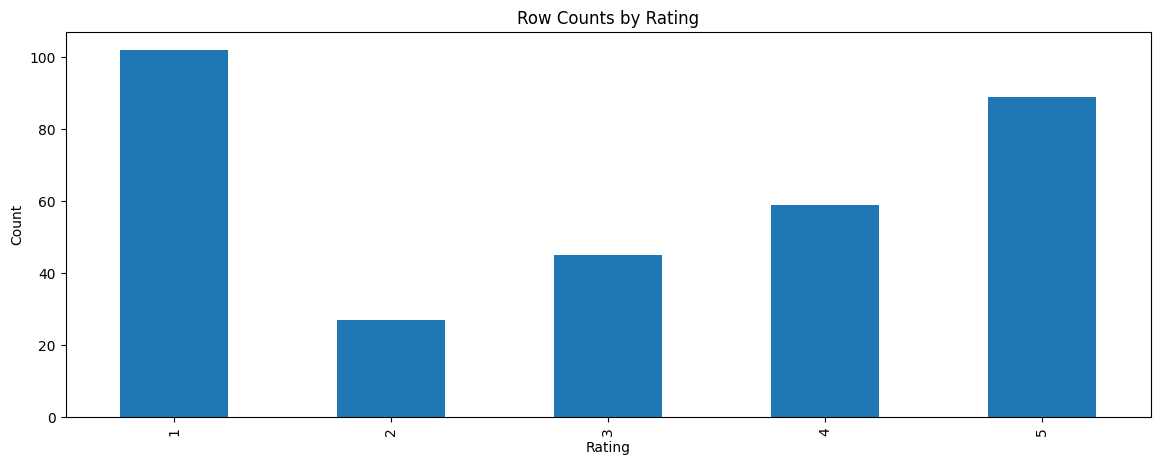

In [6]:
plt.figure(figsize=(14, 5))

cleaned_df.groupby('Rating').size().plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Row Counts by Rating')

plt.show()

### 4.2 Most Used Words

C:\Users\Tommy\AppData\Local\Temp\ipykernel_5948\1404538947.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=x, fontsize=14)


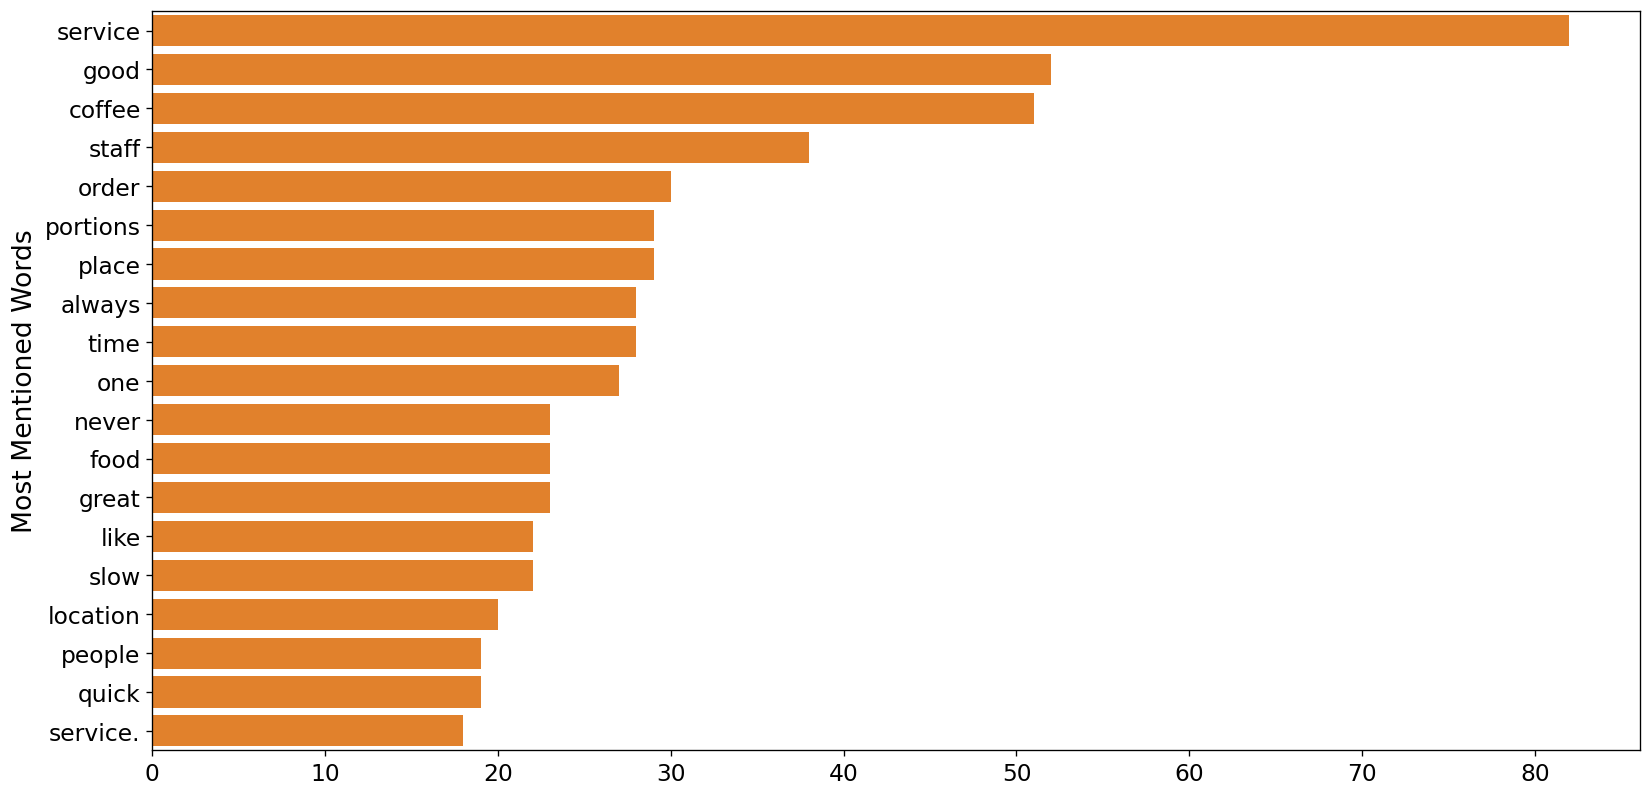

In [7]:
from collections import  Counter
from matplotlib.pyplot import figure

# Set Figure Size
figure(figsize=(16, 8), dpi=120)

def plot_top_non_stopwords_barchart(text):
    stops = stopwords.words('english')
    new_stopwords = ["go", "get"]
    stops.extend(new_stopwords)
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most_used = counter.most_common()
    x, y = [], []

    for word,count in most_used[:30]:
        if (word not in stops):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    ax = sns.barplot(x=y, y=x)
    ax.set_ylabel('Most Mentioned Words', fontsize=16)
    ax.set_yticklabels(labels=x, fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    
plot_top_non_stopwords_barchart(cleaned_df['Review'])

### 4.3. Most Frequent Words in 1-2 Stars Reviews

In [8]:
low_rated_reviews = cleaned_df.loc[cleaned_df['Rating'] <= 2]
low_rated_reviews

,Author,Rating,Review
0,lung lung,2,ice cap still consistently good. must staff gi...
1,Saad Asif,1,his hands worstttt freakinnggg him portions i ...
2,trapzzz,1,his place never food afternoon/evening underst...
4,BOUCH,1,"worst him's i've ever never go back. it busy, ..."
7,le Revenant,1,his store overwhelmed stuffed. it’s unfortunat...
...,...,...,...
289,Alain Frechette,2,convenient quick service
291,Joanne Lacoste,1,delicious dont coffee gives energy whole day!
293,Charles Vanden Abeele,1,canada’s local coffee shop like china’s fried ...
299,Thrift all Stars,1,very fast despite long line cars


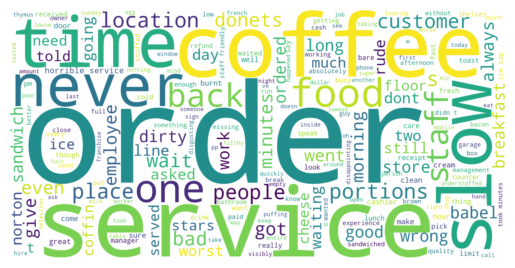

In [9]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(reviews_df):
    text = " ".join(review for review in reviews_df.Review.astype(str))
    stopwords = set(STOPWORDS)
    stopwords.update(["go", "get"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(low_rated_reviews)


### 4.4. Most Frequent Words in 4-5 Stars Reviews

In [10]:
high_rated_reviews = cleaned_df.loc[cleaned_df['Rating'] >= 4]
high_rated_reviews

,Author,Rating,Review
3,Queen Leo,5,i love place little bit dark seasonal colors w...
5,Norberto Palao,5,i misfortune dropping wallet coffee. i noticed...
6,Jabbatorre Da The Hut,4,"some comments g-map pretty bad i apprehensive,..."
12,Steve Maigue,5,"quick workers, stocked well morning. didn’t wa..."
13,Leonid Chukhovsky,5,"last service, fresh food, everything good gets."
...,...,...,...
316,Matthew Olsthoorn,5,staff shortage.
317,Cherin Sy,5,good places
318,Ammu Singh,5,very good
320,Bernard,5,last service


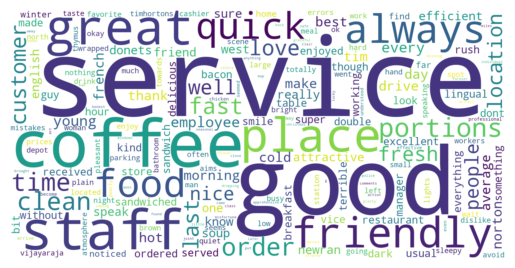

In [11]:
generate_wordcloud(high_rated_reviews)

### 4.5. Mean Rating Evolution

Final mean: 3.01863354037267


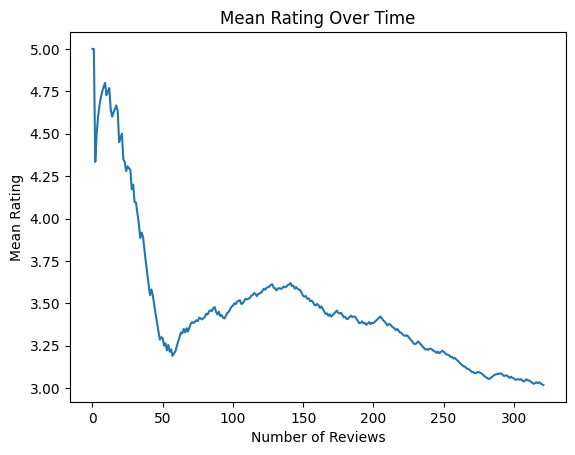

In [12]:
def update_average(avg, size, val):
    # Reference:
    # https://stackoverflow.com/questions/22999487/update-the-average-of-a-continuous-sequence-of-numbers-in-constant-time
    return (size * avg + val) / (size + 1)

def compute_means(columns):
    means = []
    old_mean = 0

    for rating in columns:
        new_mean = update_average(old_mean, len(means), rating)
        means.append(new_mean)
        old_mean = new_mean

    return means

means = compute_means(reversed(cleaned_df['Rating']))
print(f"Final mean: {means[-1]}")

plt.plot(range(len(means)), means)
plt.title("Mean Rating Over Time")
plt.xlabel("Number of Reviews")
plt.ylabel("Mean Rating")
plt.show()

## 5. Sentiment Analysis

### 5.1. Vader Model

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
analyzer = SentimentIntensityAnalyzer()

scores = cleaned_df['Review'].apply(lambda x: analyzer.polarity_scores(x))
scores.head()

0    {'neg': 0.058, 'neu': 0.726, 'pos': 0.216, 'co...
1    {'neg': 0.032, 'neu': 0.886, 'pos': 0.082, 'co...
2    {'neg': 0.165, 'neu': 0.676, 'pos': 0.159, 'co...
3    {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...
4    {'neg': 0.123, 'neu': 0.751, 'pos': 0.126, 'co...
Name: Review, dtype: object

In [15]:
cleaned_df = pd.concat([cleaned_df, scores.apply(pd.Series)], axis=1)
cleaned_df

C:\Users\Tommy\AppData\Local\Temp\ipykernel_5948\2568157195.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  cleaned_df = pd.concat([cleaned_df, scores.apply(pd.Series)], axis=1)


,Author,Rating,Review,neg,neu,pos,compound
0,lung lung,2,ice cap still consistently good. must staff gi...,0.058,0.726,0.216,0.7787
1,Saad Asif,1,his hands worstttt freakinnggg him portions i ...,0.032,0.886,0.082,0.4138
2,trapzzz,1,his place never food afternoon/evening underst...,0.165,0.676,0.159,-0.2960
3,Queen Leo,5,i love place little bit dark seasonal colors w...,0.000,0.662,0.338,0.8481
4,BOUCH,1,"worst him's i've ever never go back. it busy, ...",0.123,0.751,0.126,0.0258
...,...,...,...,...,...,...,...
317,Cherin Sy,5,good places,0.000,0.256,0.744,0.4404
318,Ammu Singh,5,very good,0.000,0.238,0.762,0.4927
319,Nu Dub (indipride),3,good service,0.000,0.256,0.744,0.4404
320,Bernard,5,last service,0.000,1.000,0.000,0.0000


### 5.2. Validation

Median: 0.17880444444444446


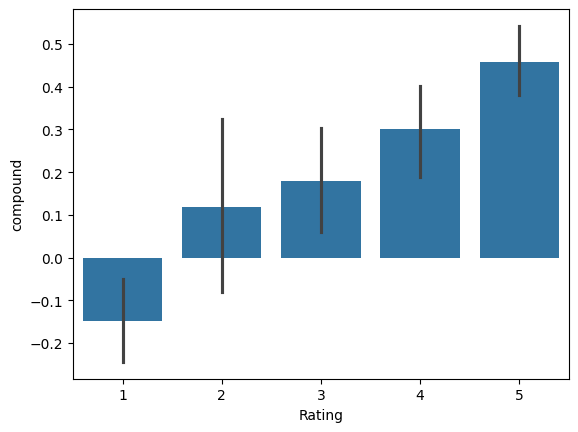

In [16]:
three_star_df = cleaned_df.loc[cleaned_df['Rating'] == 3]
compound_score_median = three_star_df['compound'].mean()
print(f"Median: {compound_score_median}")

ax = sns.barplot(data=cleaned_df, x='Rating', y='compound')
plt.show()

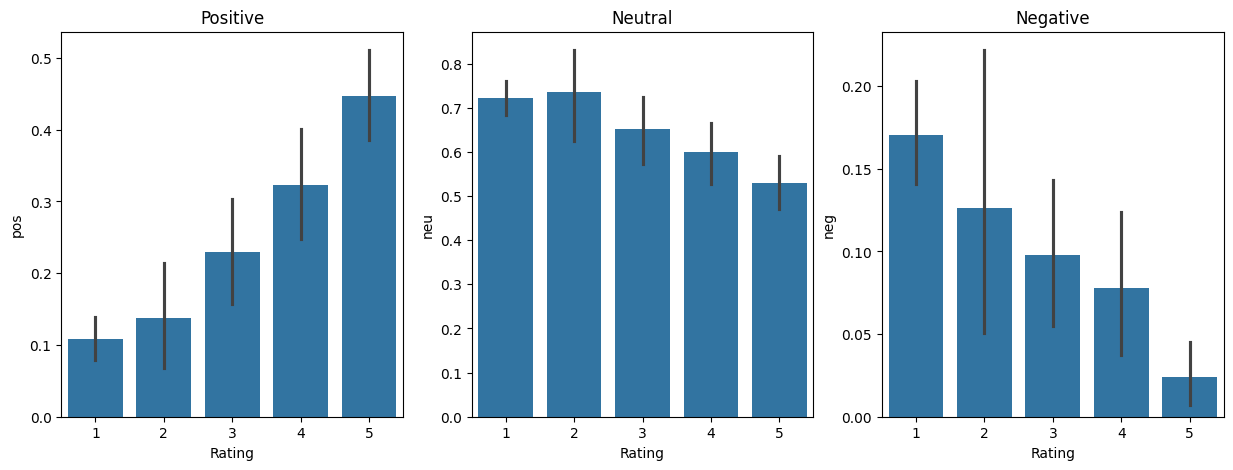

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=cleaned_df, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=cleaned_df, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=cleaned_df, x='Rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

### 5.3. Category Analysis

In [18]:
food_words = ["coffee", "donut", "food", "sandwich", "muffin", "breakfast"]
food_mask = cleaned_df['Review'].str.contains('|'.join(food_words), case=False, na=False)
food_df = cleaned_df[food_mask]

food_df.head(5)


,Author,Rating,Review,neg,neu,pos,compound
0,lung lung,2,ice cap still consistently good. must staff gi...,0.058,0.726,0.216,0.7787
1,Saad Asif,1,his hands worstttt freakinnggg him portions i ...,0.032,0.886,0.082,0.4138
2,trapzzz,1,his place never food afternoon/evening underst...,0.165,0.676,0.159,-0.2960
4,BOUCH,1,"worst him's i've ever never go back. it busy, ...",0.123,0.751,0.126,0.0258
5,Norberto Palao,5,i misfortune dropping wallet coffee. i noticed...,0.071,0.743,0.186,0.8221


In [19]:
service_words = ["service", "management", "employee", "time", "quick", "fast", "long", "slow", "staff", "minutes", "wait"]
service_mask = cleaned_df['Review'].str.contains('|'.join(service_words), case=False, na=False)
service_df = cleaned_df[service_mask]

service_df.head(5)

,Author,Rating,Review,neg,neu,pos,compound
0,lung lung,2,ice cap still consistently good. must staff gi...,0.058,0.726,0.216,0.7787
1,Saad Asif,1,his hands worstttt freakinnggg him portions i ...,0.032,0.886,0.082,0.4138
2,trapzzz,1,his place never food afternoon/evening underst...,0.165,0.676,0.159,-0.2960
4,BOUCH,1,"worst him's i've ever never go back. it busy, ...",0.123,0.751,0.126,0.0258
5,Norberto Palao,5,i misfortune dropping wallet coffee. i noticed...,0.071,0.743,0.186,0.8221


In [20]:
price_words = ["cost", "price", "cheap"]
price_mask = cleaned_df['Review'].str.contains('|'.join(price_words), case=False, na=False)
price_df = cleaned_df[price_mask]

price_df.head(5)

,Author,Rating,Review,neg,neu,pos,compound
24,D W,1,"sunday morning, september 24, 8:05 a.m. ordere...",0.041,0.908,0.051,0.1124
39,Carl Dourambeis,1,"activate pp 2 deals, size coffee breakfast san...",0.058,0.829,0.113,0.5932
53,Ricardo Sibaja,3,him portions nice honestly even best high qual...,0.131,0.560,0.309,0.9509
83,Joel Barman,4,"everytime i come great white north, i always g...",0.159,0.542,0.298,0.6249
118,John Samways,5,it great. i tried very burgher. vice taste bit...,0.000,0.492,0.508,0.8519


In [21]:
environment_words = ["floor", "place", "filthy", "dirty", "clean", "table"]
environment_mask = cleaned_df['Review'].str.contains('|'.join(environment_words), case=False, na=False)
environment_df = cleaned_df[environment_mask]

environment_df.head(5)

,Author,Rating,Review,neg,neu,pos,compound
0,lung lung,2,ice cap still consistently good. must staff gi...,0.058,0.726,0.216,0.7787
2,trapzzz,1,his place never food afternoon/evening underst...,0.165,0.676,0.159,-0.2960
3,Queen Leo,5,i love place little bit dark seasonal colors w...,0.000,0.662,0.338,0.8481
5,Norberto Palao,5,i misfortune dropping wallet coffee. i noticed...,0.071,0.743,0.186,0.8221
7,le Revenant,1,his store overwhelmed stuffed. it’s unfortunat...,0.230,0.722,0.048,-0.9366


Food score: 0.16395436893203882
Service score: 0.19852473684210528
Price score: 0.5368857142857142
Environment score: 0.24450579710144926


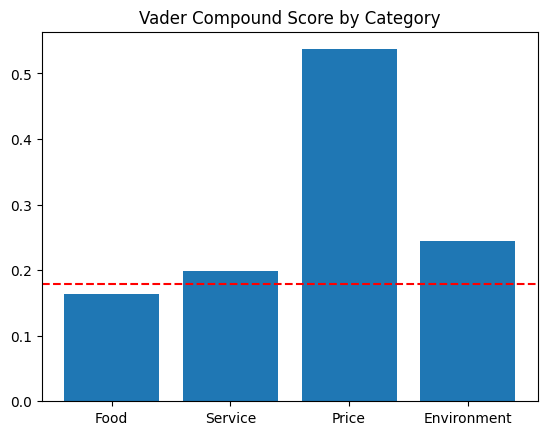

In [30]:
food_mean = food_df['compound'].mean()
service_mean = service_df['compound'].mean()
price_mean = price_df['compound'].mean()
environment_mean = environment_df['compound'].mean()

print(f"Food score: {food_mean}")
print(f"Service score: {service_mean}")
print(f"Price score: {price_mean}")
print(f"Environment score: {environment_mean}")

x = (["Food", "Service", "Price", "Environment"])
y = ([food_mean, service_mean, price_mean, environment_mean])

plt.title("Vader Compound Score by Category")
plt.bar(x, y)
plt.axhline(y=compound_score_median, linestyle="--", color='r')
plt.show()

### 5.4. Evolution of Vader Score by Category

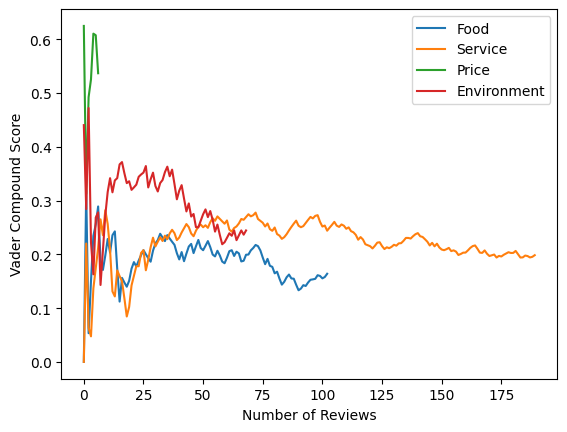

In [23]:
food_means = compute_means(reversed(food_df['compound'].tolist()))
service_means = compute_means(reversed(service_df['compound'].tolist()))
price_means = compute_means(reversed(price_df['compound'].tolist()))
environment_means = compute_means(reversed(environment_df['compound'].tolist()))

plt.plot(range(len(food_means)), food_means, label="Food")
plt.plot(range(len(service_means)), service_means, label="Service")
plt.plot(range(len(price_means)), price_means, label="Price")
plt.plot(range(len(environment_means)), environment_means, label="Environment")
plt.xlabel("Number of Reviews")
plt.ylabel("Vader Compound Score")
plt.legend()
plt.show()